In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm
from datetime import datetime 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pyforest 
import warnings
warnings.filterwarnings("ignore")

In [26]:
train = pd.read_csv('train.csv')

In [27]:
train.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [14]:
train.shape

(800, 10)

In [29]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_score,800.0,565.405000,159.528109,300.00000,426.750000,553.000000,702.000000,849.000000
income,800.0,85779.287500,37972.705711,20060.00000,53056.250000,85105.000000,118776.000000,149972.000000
loan_amount,800.0,27795.651250,12819.525021,5097.00000,16136.000000,28518.500000,38539.750000,49976.000000
loan_term,800.0,36.315000,17.163012,12.00000,24.000000,36.000000,48.000000,60.000000
interest_rate,800.0,8.732238,3.670453,2.51000,5.537500,8.725000,11.915000,14.990000
debt_to_income_ratio,800.0,29.812500,11.626346,10.00000,19.925000,29.645000,40.005000,49.910000
employment_years,800.0,16.376250,10.036339,0.00000,8.000000,16.000000,25.000000,34.000000
savings_balance,800.0,48850.921250,29785.455545,28.00000,21359.750000,47314.500000,76191.000000,99976.000000
age,800.0,42.443750,15.011446,18.00000,29.000000,42.000000,55.250000,69.000000
default_risk_score,800.0,4529.968687,2567.048232,49.75794,2377.592064,4379.666025,6821.026905,9113.843128


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [23]:
train.duplicated().sum()

0

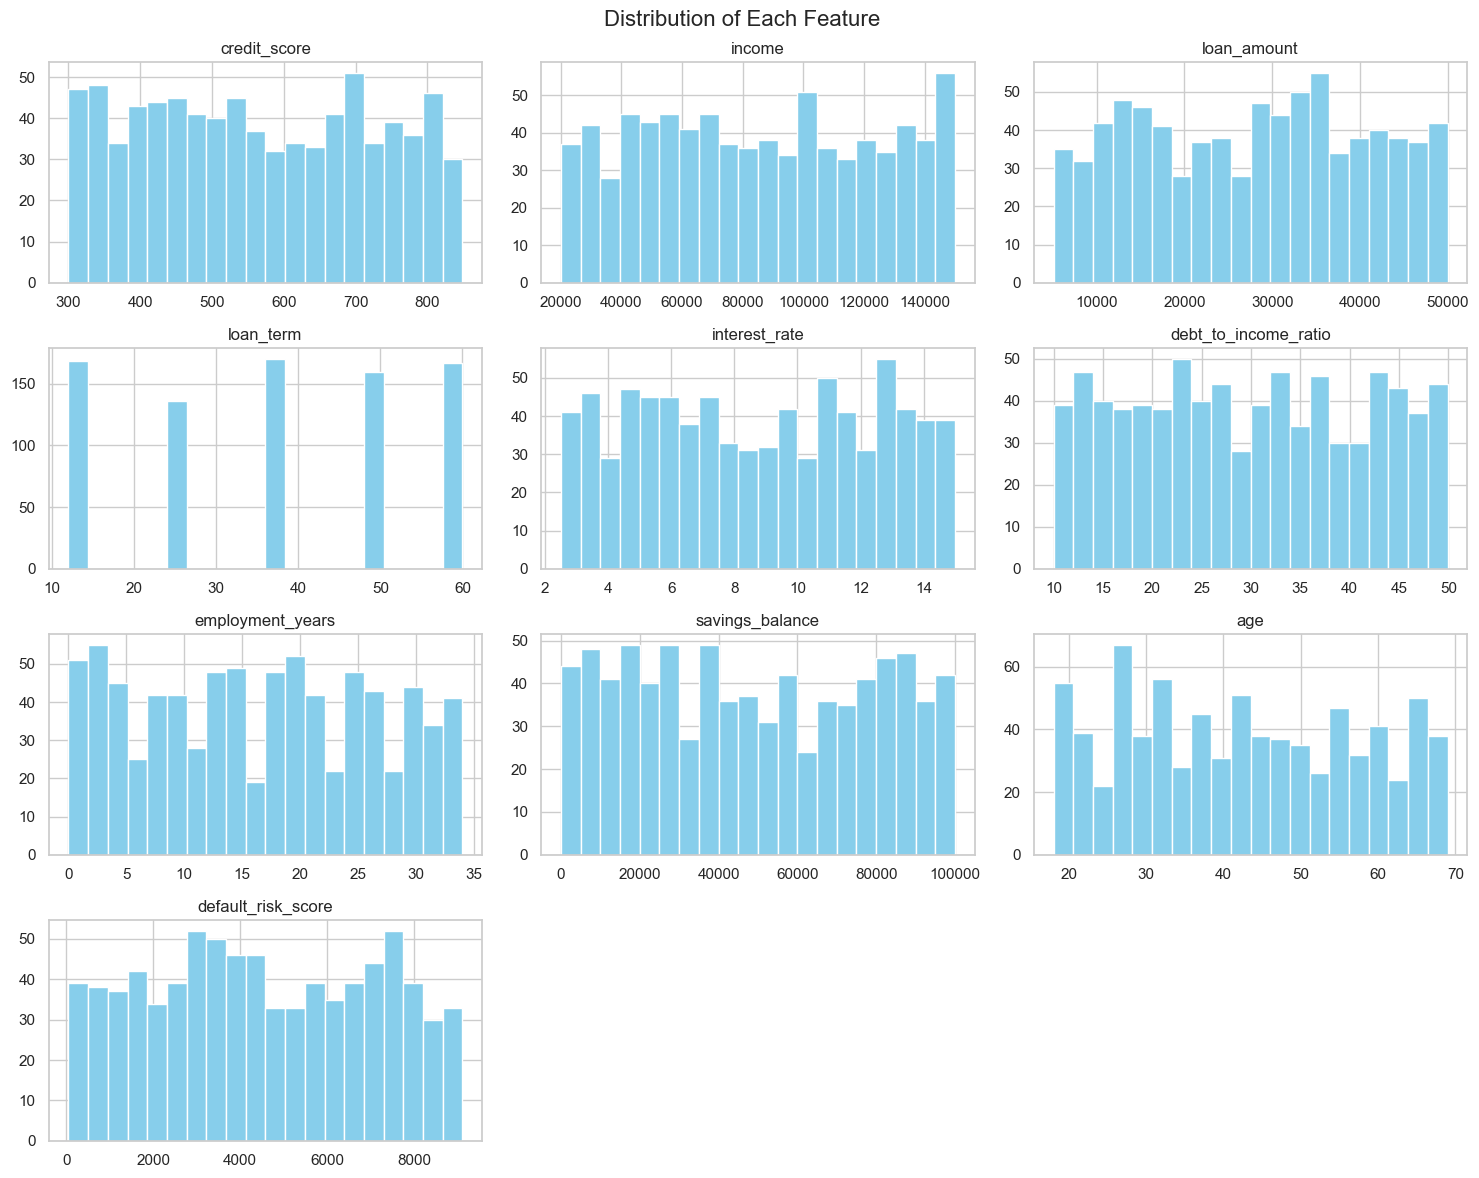

In [30]:
 # Set plot style
sns.set(style="whitegrid")

#  Histograms for Each Feature
train.hist(bins=20, figsize=(15, 12), color='skyblue')
plt.suptitle('Distribution of Each Feature', fontsize=16)
plt.tight_layout()
plt.show()

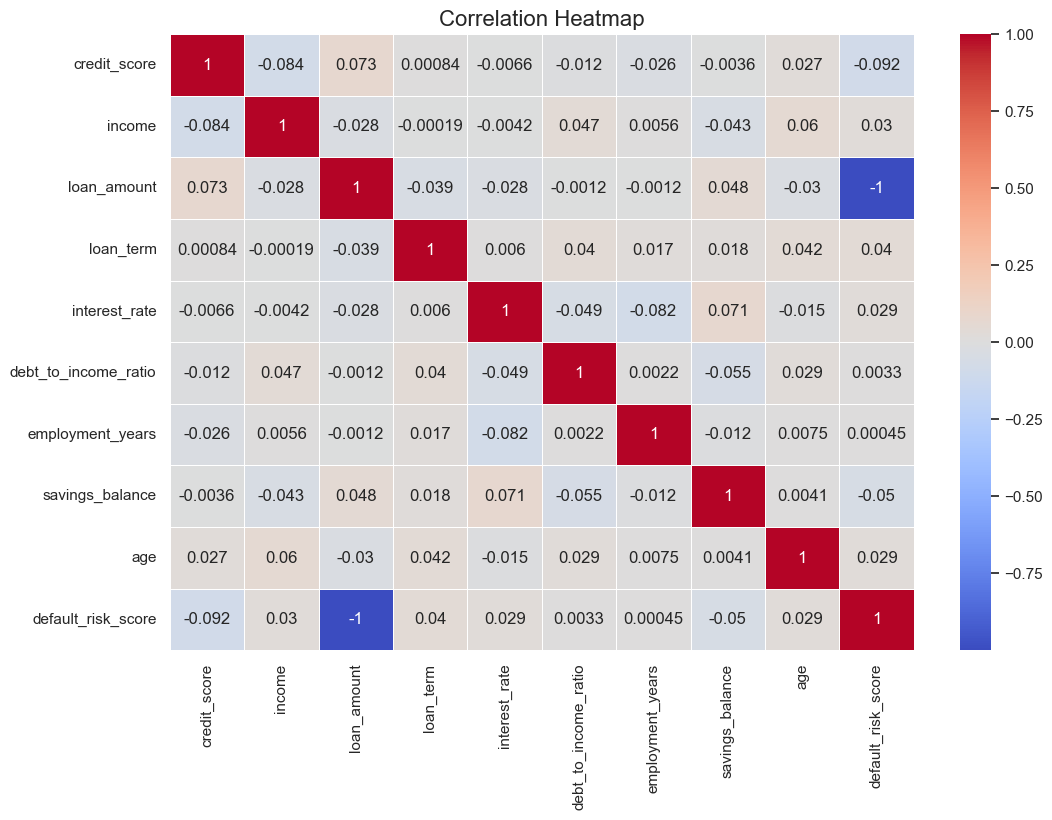

In [31]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

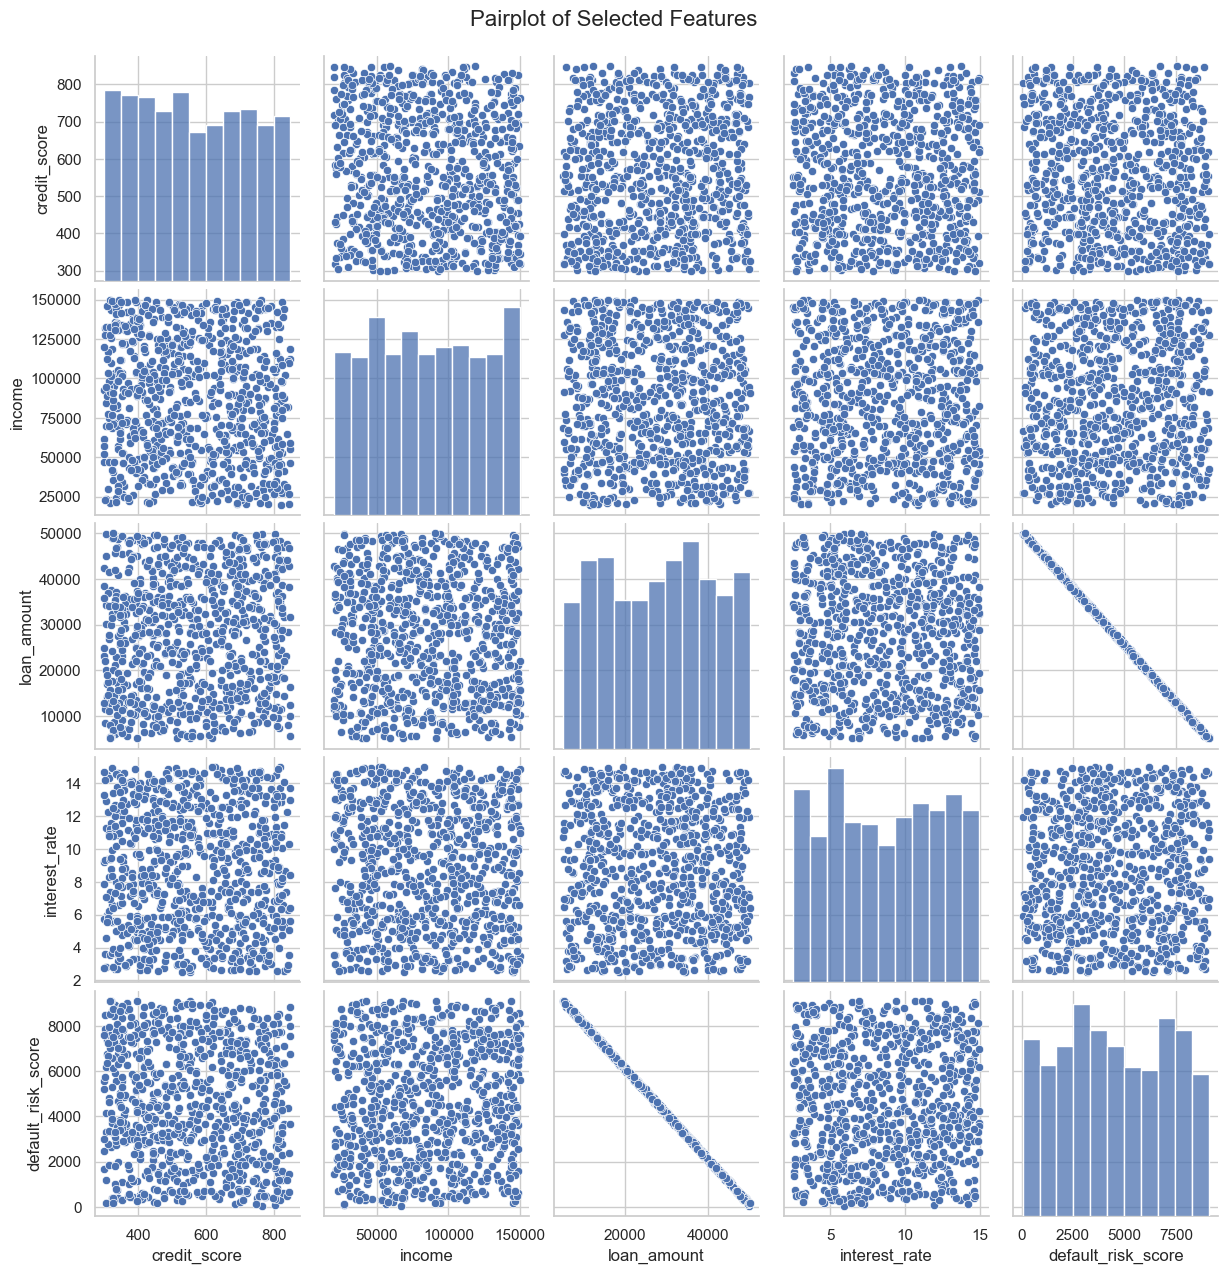

In [32]:
# Pairplot (Selected Columns)
selected_columns = ['credit_score', 'income', 'loan_amount', 'interest_rate', 'default_risk_score']
sns.pairplot(train[selected_columns], diag_kind='hist')
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()

In [35]:
X = train.drop(columns=['default_risk_score'])

In [40]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit_score,800.0,565.405000,159.528109,300.00,426.7500,553.000,702.000,849.00
income,800.0,85779.287500,37972.705711,20060.00,53056.2500,85105.000,118776.000,149972.00
loan_amount,800.0,27795.651250,12819.525021,5097.00,16136.0000,28518.500,38539.750,49976.00
loan_term,800.0,36.315000,17.163012,12.00,24.0000,36.000,48.000,60.00
interest_rate,800.0,8.732238,3.670453,2.51,5.5375,8.725,11.915,14.99
debt_to_income_ratio,800.0,29.812500,11.626346,10.00,19.9250,29.645,40.005,49.91
employment_years,800.0,16.376250,10.036339,0.00,8.0000,16.000,25.000,34.00
savings_balance,800.0,48850.921250,29785.455545,28.00,21359.7500,47314.500,76191.000,99976.00
age,800.0,42.443750,15.011446,18.00,29.0000,42.000,55.250,69.00


In [ ]:
X.head()



,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age
0,810,107410,11924,48,7.97,43.29,32,27181,58
1,418,37482,19291,24,6.94,11.01,33,15089,43
2,724,85641,39501,36,8.59,37.11,0,97459,33
3,444,73331,25714,36,13.09,33.39,18,2413,48
4,440,46723,35651,36,8.30,46.21,6,9716,42


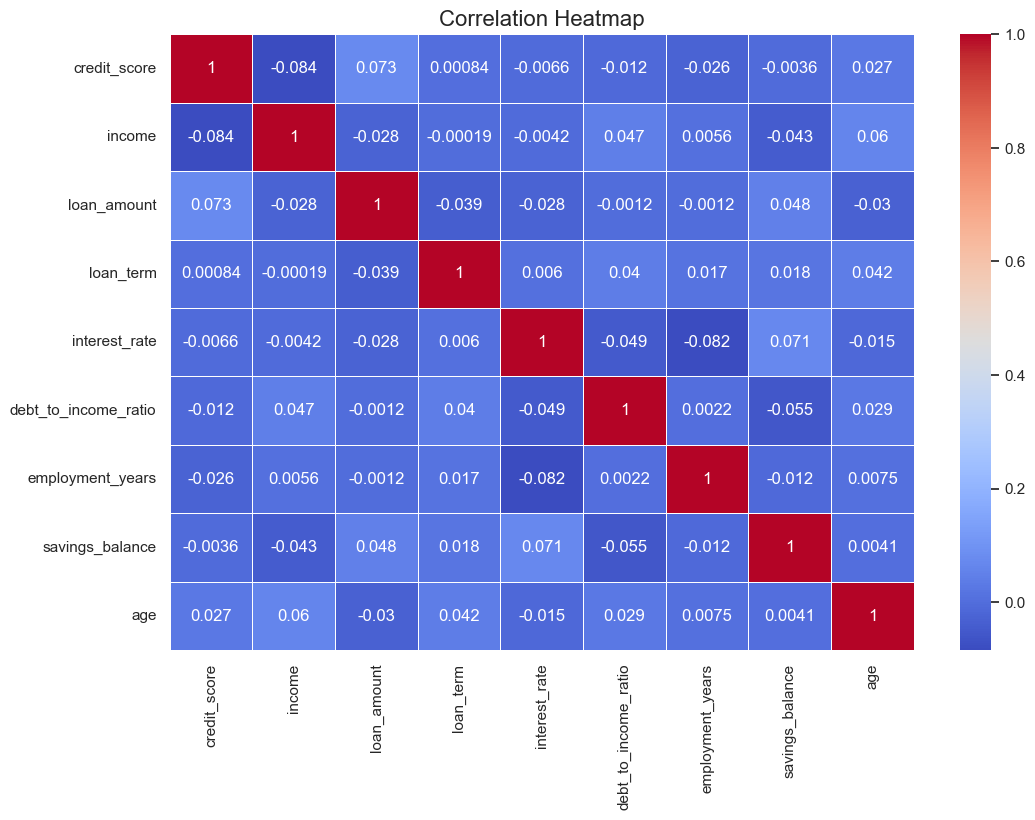

In [41]:
# plot pearson correlation coefficients for all numerical variables

Xcorr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(Xcorr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
# log transformation 
train['default_risk_score'] = np.log(train['default_risk_score'] + 1)

In [43]:
train.head(10)

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,8.940569
1,418,37482,19291,24,6.94,11.01,33,15089,43,8.740470
2,724,85641,39501,36,8.59,37.11,0,97459,33,7.672813
3,444,73331,25714,36,13.09,33.39,18,2413,48,8.513263
4,440,46723,35651,36,8.30,46.21,6,9716,42,8.004650
5,634,149410,7520,36,8.56,35.98,12,57089,66,9.056463
6,422,86150,36910,12,11.73,46.69,30,60119,27,7.922859
7,679,99671,7307,12,3.38,42.58,3,2739,34,9.062531
8,526,141041,33270,48,12.56,17.24,8,10619,36,8.150329
9,582,106652,22921,48,14.14,43.10,3,20661,47,8.615320


In [44]:
y = train['default_risk_score']

In [ ]:
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

In [ ]:
train.describe().transpose()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Adding a constant for VIF calculation
X_vif = sm.add_constant(X)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF values
vif_data.sort_values(by='VIF', ascending=False)

In [ ]:
# Plotting the boxplot for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=train, orient='h')
plt.title('Boxplot of All Features')
plt.xlabel('Value')
plt.show()

In [ ]:
"""# 1. Debt-Related Features
train['Loan_to_Income_Ratio'] = train['loan_amount'] / train['income']
train['Savings_to_Income_Ratio'] = train['savings_balance'] / train['income']
train['Debt_Service_Coverage_Ratio'] = train['income'] / (train['loan_amount'] * train['interest_rate'] / 100)
train['Debt_Age_Ratio'] = train['debt_to_income_ratio'] / train['age']

# 2. Credit & Loan Features
train['Credit_Age'] = train['age'] - train['employment_years']
train['Loan_to_Savings_Ratio'] = train['loan_amount'] / train['savings_balance']
train['Effective_Interest_Rate'] = train['interest_rate'] / train['loan_term']

# 3. Risk-Related Features
train['Income_Risk_Score'] = train['income'] / (train['loan_amount'] * train['loan_term'])
train['Risk_Per_Year'] = train['default_risk_score'] / train['loan_term']

# 4. Interaction Features
train['Credit_Income_Interaction'] = train['credit_score'] * train['income']
train['Loan_Term_Employment_Interaction'] = train['loan_term'] * train['employment_years']

# 5. Categorical Binning
train['Age_Group'] = pd.cut(train['age'], bins=[18, 30, 50, 70], labels=['Young', 'Middle-aged', 'Senior'])
train['Income_Bracket'] = pd.qcut(train['income'], q=3, labels=['Low', 'Medium', 'High'])
train['Loan_Amount_Bracket'] = pd.qcut(train['loan_amount'], q=3, labels=['Small', 'Medium', 'Large'])

# 6. Aggregated Features
train['Total_Financial_Health'] = train['income'] + train['savings_balance'] - (train['loan_amount'] * train['debt_to_income_ratio'])
train['Net_Income_After_Loan'] = train['income'] - (train['loan_amount'] * train['interest_rate'] / 100)"""

"""# 7. Polynomial Features (Example: 2nd-degree interaction)
train['Credit_Age_Squared'] = train['Credit_Age'] ** 2
train['Income_Loan_Interaction'] = train['income'] * train['loan_amount']"""

# 8. Log-Transformations (For Highly Skewed Data)
"""train['Log_Income'] = np.log1p(train['income'])
train['Log_Savings_Balance'] = np.log1p(train['savings_balance'])
train['Log_Loan_Amount'] = np.log1p(train['loan_amount'])"""

In [ ]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Dimensionality Reduction with PCA (to preserve 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Number of PCA components selected:", pca.n_components_)

In [ ]:
# Model Selection and Hyperparameter Tuning Using Ridge Regression
# Ridge (L2 regularization) can help control overfitting.
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=3, scoring='r2')  # Using 3-fold CV due to small data size
grid_search.fit(X_train_pca, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha from grid search:", best_alpha)
# Train the final Ridge model with the best hyperparameter
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_pca, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Make Predictions and Evaluate the Model
y_pred = best_ridge.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)